In [59]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Download stock data using yfinance
data = yf.download('GOOG', start='2020-01-01', end='2024-01-31')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.Close.values.reshape(-1,1))

# Create a function to prepare the data
def prepare_data(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Prepare data for training and testing
window_size = 100
x_train, y_train = prepare_data(data_scaled[:int(len(data) * 0.8)], window_size)
x_test, y_test = prepare_data(data_scaled[int(len(data) * 0.8):], window_size)

# Create an SVM model
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(y_pred.reshape(-1,1))



[*********************100%%**********************]  1 of 1 completed


Accuracy of SVM Model: 0.0 %
Root Mean Squared Error of SVM Model: 132.83775312845682


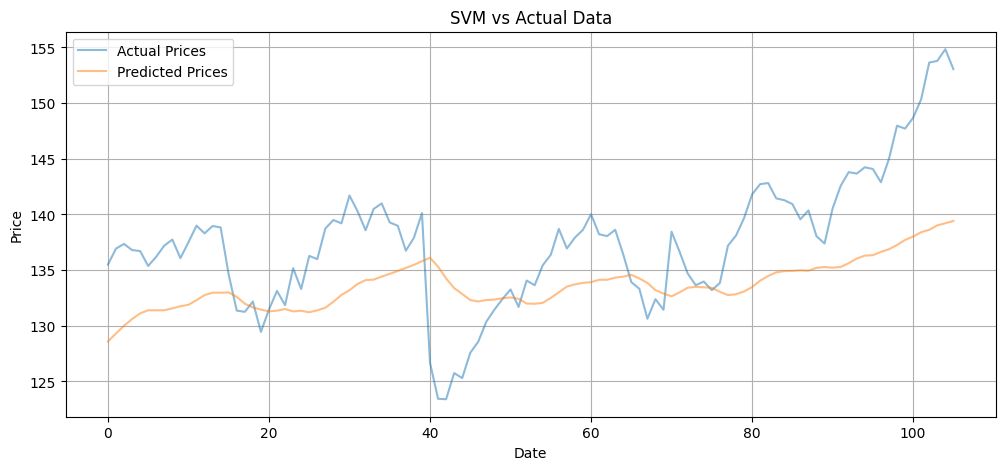

In [60]:
future_predictions = []
for i in range(len(x_test)):
    future_predictions.append(model.predict(x_test[i].reshape(1, 100)))

future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predicted and actual values to get original scales
predictions = scaler.inverse_transform(future_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate accuracy
predictions_svm = scaler.inverse_transform(model.predict(x_test).reshape(-1, 1))
num_correct_svm = 0
for i in range(len(predictions_svm)):
    if abs(predictions_svm[i] - y_test[i]) < 1:
        num_correct_svm += 1

acc_svm = (num_correct_svm / len(predictions_svm)) * 100
print('Accuracy of SVM Model:', acc_svm, '%')

mse = mean_squared_error(y_test, predictions_svm)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of SVM Model:', rmse)


# Plot the comparison graph
plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual Prices', alpha=0.5)
plt.plot(predictions, label='Predicted Prices', alpha=0.5)
plt.legend(loc='upper left')
plt.title('SVM vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()